### Re-project, buffer, dissolve and intersect birds to Utah's major streams

We are going to buffer major streams to 300 feet and clip bird occurrences to that buffer. Thus, we want to re-project our data to a crs that minimizes horizontal distortion.

Use re-projected data to buffer and dissolve major streams. Overlay the results with the birds layer and intersect them. The resulting bird layer will be the main layer used in our web map.

Notebook by Zac Stanley for New Maps Plus - MAP674

#### Initialize python libraries

In [4]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# change default figure size
plt.rcParams['figure.figsize'] = (15,12)

#### Import local datasets that have been explored and refined

In [5]:
#utah major streams
utah_major_streams = gpd.read_file ("./data/utah_major_streams.geojson")

# sw_birds
sw_birds = gpd.read_file("./data/sw_birds.geojson")

#### Check CRS of each object

In [8]:
# utah_major_streams
utah_major_streams.crs

{'init': 'epsg:4326'}

In [9]:
# sw_birds
sw_birds.crs

{'init': 'epsg:4326'}

#### Re-project layers that spatial analysis is performed on

In [11]:
# set a variable with parameters for USA Contiguous Equidistant
project_params  = '+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'

# reproject and assign to new variables
streams_prj = utah_major_streams.to_crs(project_params)
birds_prj = sw_birds.to_crs(project_params)

#### Plot streams_prj

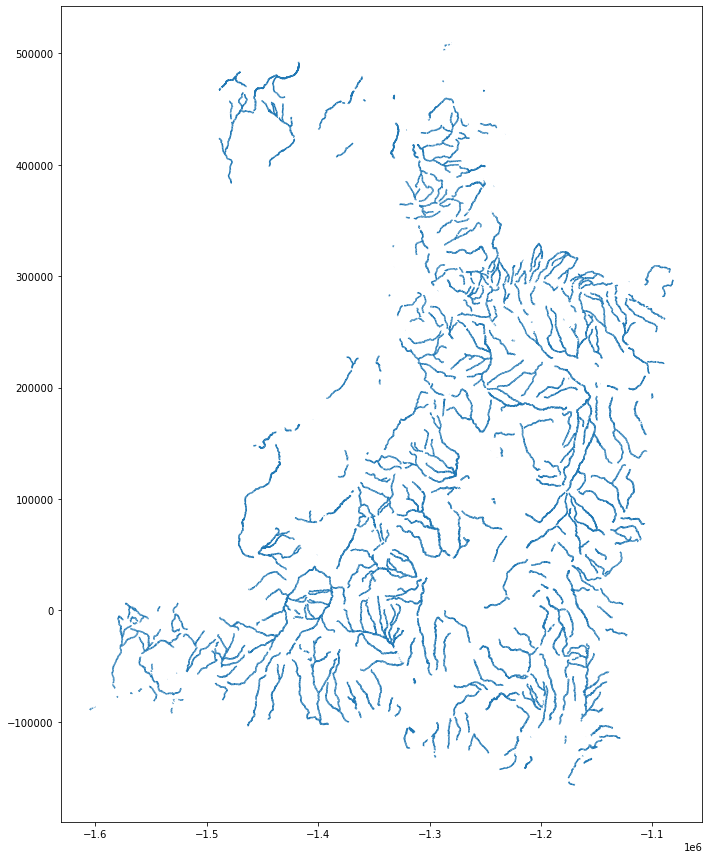

In [13]:
# plot streams
streams_prj.plot(figsize=(15,15));

#### Plot birds_prj

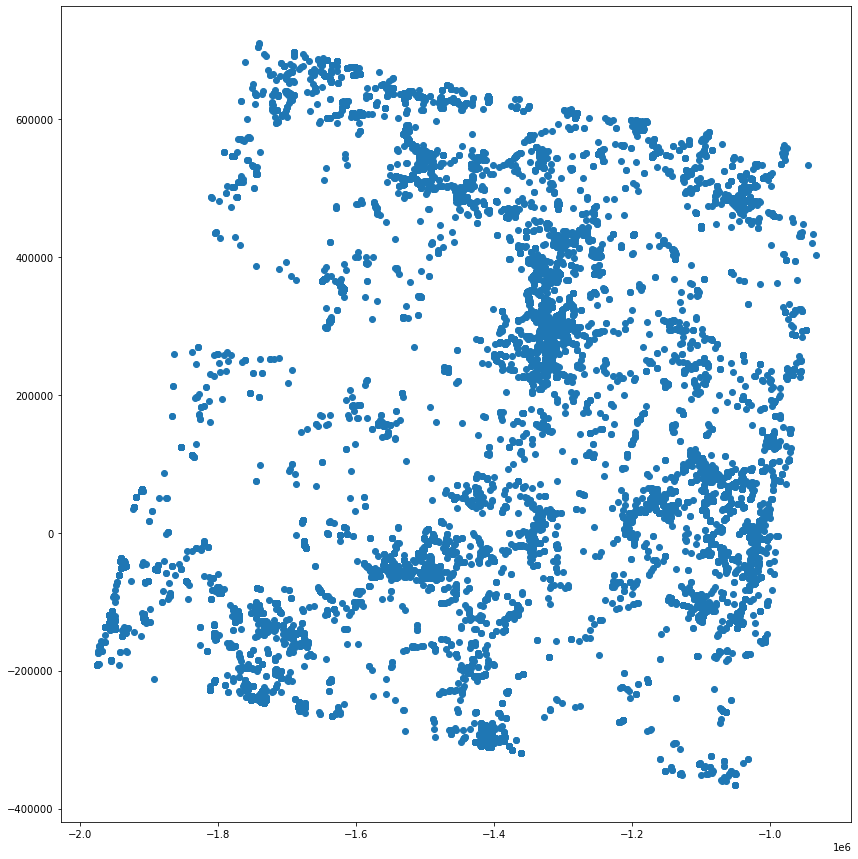

In [11]:
birds_prj.plot(figsize=(15,15));

#### Write projected objects to geoJSONs

In [16]:
birds_prj.to_file("./data/birds_prj.geojson", driver='GeoJSON')
streams_prj.to_file("./data/streams_prj.geojson", driver='GeoJSON')